# Practice creating an xarray

In [51]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

# DataArray

In [2]:
data = np.random.rand(4, 3)
locs = ["IA", "IL", "IN"]
times = pd.date_range("2000-01-01", periods=4)
foo = xr.DataArray(data, coords=[times, locs], dims=["time", "space"])

In [3]:
foo

<xarray.DataArray (time: 4, space: 3)> Size: 96B
array([[0.43483286, 0.54147092, 0.68358086],
       [0.84953653, 0.30945015, 0.9844764 ],
       [0.64781166, 0.6327888 , 0.98578167],
       [0.56842386, 0.6277636 , 0.99755675]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'

In [4]:
xr.DataArray(data)

<xarray.DataArray (dim_0: 4, dim_1: 3)> Size: 96B
array([[0.43483286, 0.54147092, 0.68358086],
       [0.84953653, 0.30945015, 0.9844764 ],
       [0.64781166, 0.6327888 , 0.98578167],
       [0.56842386, 0.6277636 , 0.99755675]])
Dimensions without coordinates: dim_0, dim_1

## Coordinates

Coordinates can be specified in the following ways:

A list of values with length equal to the number of dimensions, providing coordinate labels for each dimension. Each value must be of one of the following forms:

A DataArray or Variable

A tuple of the form (dims, data[, attrs]), which is converted into arguments for Variable

A pandas object or scalar value, which is converted into a DataArray

A 1D array or list, which is interpreted as values for a one dimensional coordinate variable along the same dimension as it’s name

A dictionary of {coord_name: coord} where values are of the same form as the list. Supplying coordinates as a dictionary allows other coordinates than those corresponding to dimensions (more on these later). If you supply coords as a dictionary, you must explicitly provide dims.

In [5]:
# As a list of tuples
xr.DataArray(data, coords=[("time", times), ("space", locs)])

<xarray.DataArray (time: 4, space: 3)> Size: 96B
array([[0.43483286, 0.54147092, 0.68358086],
       [0.84953653, 0.30945015, 0.9844764 ],
       [0.64781166, 0.6327888 , 0.98578167],
       [0.56842386, 0.6277636 , 0.99755675]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'

In [6]:
# As a dictionary
xr.DataArray(
    data,
    coords={
        "time": times,
        "space": locs,
        "const": 42,
        "ranking": ("space", [1, 2, 3]),
    },
    dims=["time", "space"],
)

<xarray.DataArray (time: 4, space: 3)> Size: 96B
array([[0.43483286, 0.54147092, 0.68358086],
       [0.84953653, 0.30945015, 0.9844764 ],
       [0.64781166, 0.6327888 , 0.98578167],
       [0.56842386, 0.6277636 , 0.99755675]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
    const    int64 8B 42
    ranking  (space) int64 24B 1 2 3

### This is what I can use to define coordinates. Dims will always be x, y, z...

In [7]:
# As a dictionary with coords across multiple dimensions
xr.DataArray(
    data,
    coords={
        "time": times,
        "space": locs,
        "const": 42,
        "ranking": (("time", "space"), np.arange(12).reshape(4, 3)),
    },
    dims=["time", "space"],
)

<xarray.DataArray (time: 4, space: 3)> Size: 96B
array([[0.43483286, 0.54147092, 0.68358086],
       [0.84953653, 0.30945015, 0.9844764 ],
       [0.64781166, 0.6327888 , 0.98578167],
       [0.56842386, 0.6277636 , 0.99755675]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
    const    int64 8B 42
    ranking  (time, space) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11

In [8]:
_["ranking"]

<xarray.DataArray 'ranking' (time: 4, space: 3)> Size: 96B
array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
    const    int64 8B 42
    ranking  (time, space) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11

## DataArray properties

In [9]:
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'

In [10]:
foo.name = "foo"
foo.attrs["units"] = "meters"

In [11]:
foo

<xarray.DataArray 'foo' (time: 4, space: 3)> Size: 96B
array([[0.43483286, 0.54147092, 0.68358086],
       [0.84953653, 0.30945015, 0.9844764 ],
       [0.64781166, 0.6327888 , 0.98578167],
       [0.56842386, 0.6277636 , 0.99755675]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
Attributes:
    units:    meters

In [12]:
foo.rename("bar")

<xarray.DataArray 'bar' (time: 4, space: 3)> Size: 96B
array([[0.43483286, 0.54147092, 0.68358086],
       [0.84953653, 0.30945015, 0.9844764 ],
       [0.64781166, 0.6327888 , 0.98578167],
       [0.56842386, 0.6277636 , 0.99755675]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
Attributes:
    units:    meters

## DataArray Coordinates

The coords property is dict like. Individual coordinates can be accessed from the coordinates by name, or even by indexing the data array itself:

In [13]:
foo.coords["time"]

<xarray.DataArray 'time' (time: 4)> Size: 32B
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04

In [14]:
foo["time"]

<xarray.DataArray 'time' (time: 4)> Size: 32B
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04

These are also DataArray objects, which contain tick-labels for each dimension.

Coordinates can also be set or removed by using the dictionary like syntax:

In [15]:
foo["add_dim"] = ("space", [1, 2, 3])

In [16]:
foo

<xarray.DataArray 'foo' (time: 4, space: 3)> Size: 96B
array([[0.43483286, 0.54147092, 0.68358086],
       [0.84953653, 0.30945015, 0.9844764 ],
       [0.64781166, 0.6327888 , 0.98578167],
       [0.56842386, 0.6277636 , 0.99755675]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
    add_dim  (space) int64 24B 1 2 3
Attributes:
    units:    meters

In [17]:
del foo["add_dim"]

In [18]:
foo

<xarray.DataArray 'foo' (time: 4, space: 3)> Size: 96B
array([[0.43483286, 0.54147092, 0.68358086],
       [0.84953653, 0.30945015, 0.9844764 ],
       [0.64781166, 0.6327888 , 0.98578167],
       [0.56842386, 0.6277636 , 0.99755675]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
Attributes:
    units:    meters

# Dataset

xarray.Dataset is xarray’s multi-dimensional equivalent of a DataFrame. It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the netCDF file format.

In [19]:
# creating a dataset
temp = 15 + 8 * np.random.randn(2, 2, 3)
precip = 10 * np.random.rand(2, 2, 3)
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]

# for real use cases, its good practice to supply array attributes such as
# units, but we won't bother here for the sake of brevity
ds = xr.Dataset(
    {
        "temperature": (["x", "y", "time"], temp),
        "precipitation": (["x", "y", "time"], precip),
    },
    coords={
        "lon": (["x", "y"], lon),
        "lat": (["x", "y"], lat),
        "time": pd.date_range("2014-09-06", periods=3),
        "reference_time": pd.Timestamp("2014-09-05"),
    },
)

In [20]:
ds

<xarray.Dataset> Size: 288B
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 32B -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 32B 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 24B 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 96B 11.82 9.543 11.14 ... 18.9 22.01
    precipitation   (x, y, time) float64 96B 0.9731 3.841 5.567 ... 8.56 5.785

In [ ]:
ds["temperature"] + 1j * ds["precipitation"]

In [ ]:
np.angle(_.values)

In [ ]:
ds.data_vars

In [ ]:
ds.coords

In [ ]:
ds.coords["lon"].attrs["long name"] = "longitude"

In [ ]:
ds.temperature

In [ ]:
ds.temperature["lat"].plot()

In [ ]:
ds["temperature"]

In [ ]:
ds.attrs = {"test_dict":{'a': 1,'b': 2,'c': {"more_complicated": 3}},"long_name": "temperature and precipitation"}

In [ ]:
ds

In [ ]:
ds.attrs["test_dict"]

In [ ]:
ds.attrs["test_dict"]["c"]["more_complicated"]

In [ ]:
for keys in ds.attrs:
    print(keys)

In [24]:
ds.attrs['sequence'] = """with for_(n, 0, n < n_avg, n + 1):
	with for_(*from_array(t, tau_sweep)):
		with for_(*from_array(da, ff_sweep_rel)):
			play("pi", machine.qubits[qubit_index].name)
			align()
			play("const" * amp(da), machine.flux_lines[qubit_index].name, duration=t)
			align()
			readout_avg_macro(machine.resonators[qubit_index].name,I,Q)
			align()
			wait(50)
			play("const" * amp(-da), machine.flux_lines[qubit_index].name, duration=t)
			save(I, I_st)
			save(Q, Q_st)
			wait(cd_time * u.ns, machine.resonators[qubit_index].name)
	save(n, n_st)"""

In [25]:
ds.attrs['sequence']

'with for_(n, 0, n < n_avg, n + 1):\n\twith for_(*from_array(t, tau_sweep)):\n\t\twith for_(*from_array(da, ff_sweep_rel)):\n\t\t\tplay("pi", machine.qubits[qubit_index].name)\n\t\t\talign()\n\t\t\tplay("const" * amp(da), machine.flux_lines[qubit_index].name, duration=t)\n\t\t\talign()\n\t\t\treadout_avg_macro(machine.resonators[qubit_index].name,I,Q)\n\t\t\talign()\n\t\t\twait(50)\n\t\t\tplay("const" * amp(-da), machine.flux_lines[qubit_index].name, duration=t)\n\t\t\tsave(I, I_st)\n\t\t\tsave(Q, Q_st)\n\t\t\twait(cd_time * u.ns, machine.resonators[qubit_index].name)\n\tsave(n, n_st)'

In [33]:
for keys in ds.coords:
    print(keys)

lon
lat
time
reference_time


In [39]:
ds[keys].attrs

{}

# Test of datetime

In [42]:
import datetime

In [ ]:
x = datetime.datetime.now()

In [ ]:
x.strftime("%Y-%m-%d")

In [ ]:
x.strftime("%H:%M")

In [27]:
"{}_{}".format('q0', 'SWAP2D')

'q0_SWAP2D'

In [30]:
'flux' in 'dc flux'

True

# Test of renaming the file extension

In [40]:
import os

In [43]:
timestamp_created = datetime.datetime.now()
year = timestamp_created.strftime("%Y")
month = timestamp_created.strftime("%m")
day = timestamp_created.strftime("%d")
tPath = os.path.join(r'Z:/QM_Data_DF5',year,month,'Data_'+month+day+'/')

In [45]:
tPath = os.path.join(tPath,'abc.nc')

In [46]:
tPath

'Z:/QM_Data_DF5/2024/05/Data_0501/abc.nc'

In [47]:
base_name, _ = os.path.splitext(tPath)
#new_file_path = base_name + ".py"

# Test of data naming

In [53]:
I = np.random.randn(3,5)
Q = np.random.randn(3,5)

In [60]:
x = np.arange(0,5,1)
y = np.arange(0,3,1)

In [61]:
expt_dataset = xr.Dataset(
			    {
			        "I": (["y", "x"], I),
			        "Q": (["y", "x"], Q),
			    },
			    coords={
			        "Fast Flux": (["x"], x),
			        "Time": (["y"], y),
			    },
			)

In [64]:
for keys in expt_dataset:
    print(keys)

I
Q


In [67]:
'I' in expt_dataset

True

In [68]:
expt_dataset['I']

<xarray.DataArray 'I' (y: 3, x: 5)> Size: 120B
array([[ 0.86533372,  0.52440827, -0.5299882 , -0.75935588,  1.59664635],
       [ 0.66963043,  0.52446136, -0.08930174, -1.24310276, -0.8741621 ],
       [-0.42237143, -0.24581185, -0.6035789 ,  0.41975178,  0.4630404 ]])
Coordinates:
    Fast Flux  (x) int64 40B 0 1 2 3 4
    Time       (y) int64 24B 0 1 2
Dimensions without coordinates: y, x

In [69]:
expt_dataset.I

<xarray.DataArray 'I' (y: 3, x: 5)> Size: 120B
array([[ 0.86533372,  0.52440827, -0.5299882 , -0.75935588,  1.59664635],
       [ 0.66963043,  0.52446136, -0.08930174, -1.24310276, -0.8741621 ],
       [-0.42237143, -0.24581185, -0.6035789 ,  0.41975178,  0.4630404 ]])
Coordinates:
    Fast Flux  (x) int64 40B 0 1 2 3 4
    Time       (y) int64 24B 0 1 2
Dimensions without coordinates: y, x

In [70]:
expt_dataset['I']

<xarray.DataArray 'I' (y: 3, x: 5)> Size: 120B
array([[ 0.86533372,  0.52440827, -0.5299882 , -0.75935588,  1.59664635],
       [ 0.66963043,  0.52446136, -0.08930174, -1.24310276, -0.8741621 ],
       [-0.42237143, -0.24581185, -0.6035789 ,  0.41975178,  0.4630404 ]])
Coordinates:
    Fast Flux  (x) int64 40B 0 1 2 3 4
    Time       (y) int64 24B 0 1 2
Dimensions without coordinates: y, x

In [71]:
sig_amp = np.sqrt(expt_dataset.I**2 + expt_dataset.Q**2)

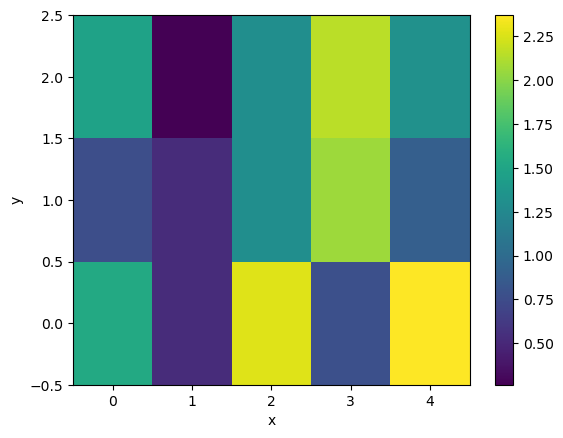

In [72]:
sig_amp.plot()